In [1]:
import os
import json
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
date_df_cd=pd.read_csv('../final_data_story/visualizations/time_compare_cd')
date_df_nyt=pd.read_csv('../final_data_story/visualizations/time_compare_nyt')
date_df_dt=pd.read_csv('../final_data_story/visualizations/time_compare_dt')
date_df_g=pd.read_csv('../final_data_story/visualizations/time_compare_g')
date_df_ht=pd.read_csv('../final_data_story/visualizations/time_compare_ht')

cd_doc = open('../data/text/china_daily/cd_composite_text.txt').read()
nyt_doc = open('../data/text/nyt/nyt_composite_text.txt').read()
g_doc = open('../data/text/guardian/g_composite_text.txt').read()
dt_doc = open('../data/text/daily_telegraph/dt_composite_text.txt').read()
ht_doc = open('../data/text/hindustan_times/ht_composite_text.txt').read()

In [3]:
%run ../data_analysis/functions.ipynb

In [4]:
%run code_tokens.ipynb

In [5]:
%run ../data_analysis/comparative_analysis_doc_term_matrix.ipynb

# Cracking Open COVID-19 Conspiracies:

<img src='cover.jpeg' >
<figcaption>
    Image by Robin Hu. Inspiration: NBC News COVID-19 Theories

### By Robin Hu, COMM 313, Spring 2021

### Introduction

From bats to humans? Since the beginning of the COVID-19 pandemic, a key question surrounds its origins. Where did such a deadly virus come from? How did the SARS-CoV2 virus pass from bats to us? While we could consider the scientific facts and while we could consult the bat scientists, equally interesting and influential are the wacky conspiracy theories. Here, we will attempt to crack open COVID-19 conspiracies on a global scale!

COVID-19 origin conspiracy theories have circulated from blogs to tweets to other social media platforms. However, that isn't all that surprising. After all, in the digital media age we live in today, we have the ability to transmit information within seconds and make things, including conspiracy theories, go "viral". What about news publications? For a media source that *should* be objective and present the facts of the matter, how are conspiracy theories being covered?

More specifically, how are the four biggest conspiracy theories being covered? This article will utilize four conspiracies. The first theory is typically referred to as the lab-leak theory, that COVID-19 originated from and escaped from a lab in Wuhan, China. A second theory, largely advanced by China, is that cold-chain contamination of imported frozen animal products are to blame. The last two theories both center around biological warfare. One blames the US, describing a scenario in which the virus originated from the US Army Medical Research Institute of Infectious Diseases at Fort Detrick in Maryland. The last theory blames China, accusing them of intentionally engineering the virus as a bioweapon.
> - Theory 1: Lab-leak: COVID-19 originated from and escaped from a lab in Wuhan, China.
- Theory 2: Cold-chain contamination: virus spread from imported frozen animal products.
- Theory 3: Fort Detrick: COVID-19 was released from the US Army Medical Research Institute in Maryland.
- Theory 4: China's bioweapon: China engineered the virus to serve as a bioweapon.

From lab-leak, cold-chain contamination, Fort Detrick, to bioweaponry, these four theories form the basis and crux of this article. This article ultimately aims to analyze news publication portrayals of these conspiracy theories from five select sources: The China Daily (China), The New York Times (US), The Daily Telegraph (Australia), The Guardian (UK), and Hindustan Times (India). Diving into a news corpus download from Lexis Nexis (full sources linked at the end) and conducting our textual analysis in Python...let's crack open these COVID-19 conspiracies!


### Temporal Trends in Publication?

The five sources selected for this analysis are, as listed in the Introduction, The China Daily (China; 443 articles), The New York Times (US; 549 articles), The Daily Telegraph (Australia; 415 articles), The Guardian (UK; 952 articles), and Hindustan Times (India; 655 articles). Conspiracy theories follow their own course in the public, in terms of when they circulate, when they surge in popularity, and when they are debunked officially and finally die down. One would expect that following the introduction and surges in conspiracy theories, that news coverage may increase accordingly. In other words, I would expect that the course of publications would follow the course of the theory or other events during the pandemic that may explain the patterns. Let's see if that truly is the case.

Text(0.1, 0.25, '# Articles Published')

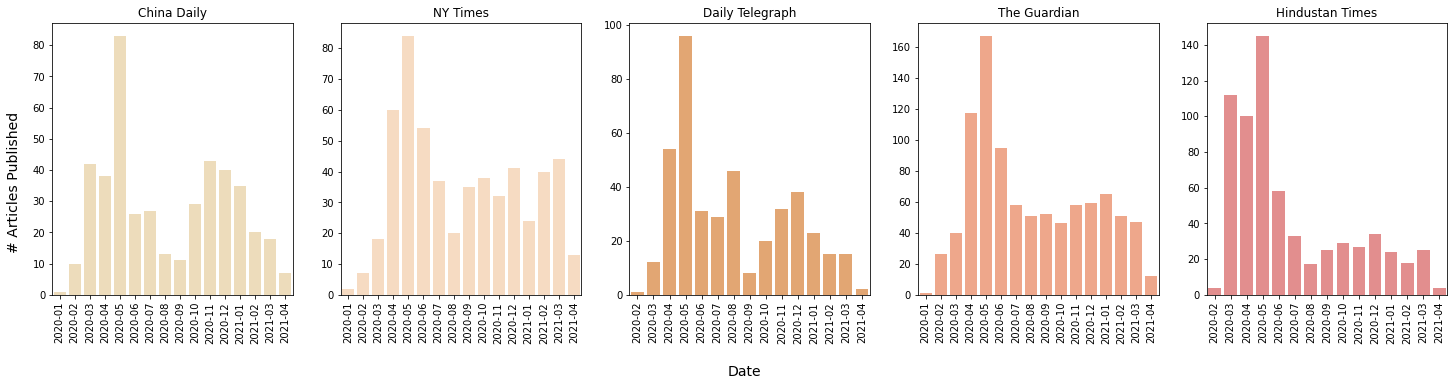

In [6]:
plt.rcParams['figure.figsize'] = [25,5]
fig, axs = plt.subplots(ncols=5)
sn.barplot(x='date', y='article', data=date_df_cd.sort_values('date'), ax=axs[0], color='wheat')
sn.barplot(x='date', y='article', data=date_df_nyt.sort_values('date'), ax=axs[1], color='peachpuff')
sn.barplot(x='date',y='article', data=date_df_dt.sort_values('date'), ax=axs[2], color='sandybrown')
sn.barplot(x='date',y='article', data=date_df_g.sort_values('date'), ax=axs[3], color='lightsalmon')
sn.barplot(x='date',y='article', data=date_df_ht.sort_values('date'), ax=axs[4], color='lightcoral')

axs[0].set_title('China Daily'); axs[1].set_title('NY Times'); axs[2].set_title('Daily Telegraph'); axs[3].set_title('The Guardian'); axs[4].set_title('Hindustan Times')
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set(xlabel=None, ylabel=None)


fig.text(0.5, -.1,'Date', fontsize=14)
fig.text(0.1, .25,'# Articles Published', fontsize=14, rotation=90) 

Figure by Robin Hu. Data from [Lexis Nexis Bulk Data Download](https://www.lexisnexis.com/en-us/gateway.page)

Based on the plots above, it appears there is a consistent pattern! Notably, the number of publications that included the search items "COVID-19" and "origins" in Lexis Nexis experienced a significant surge in the months of April and May of 2020. With the China Daily and somewhat the Daily Telegraph, there's a bimodal-like distribution with peaks around May 2020 and December 2020. The second peak is less pronounced with the NY Times distribution and the Guardian, although we do see that there was an uptick in publications close to the start of 2021. 

What could potentially explain this? Well, for one, conspiracy theories first emerged late January 2020 to early February 2020. The spike in April/May may just be a reasonable delay in the reporting, particularly as debate over the virus' origins escalated around that time. Although we are unable to prescribe a causative relationship, we can say that the clear patterns found in all five sources is a consideration when deep diving into the textual analysis. That is, many of the publications that explicitly discuss the conspiracy theories may cluster around a particular point in time. As new developments arise, especially with the World Health Organization's updates and investigative reports, we can likely expect a similar surge in publications.

### Textual Trends between Publications?

While the timing of publications seem to match well between the five sources, what about its content? What can we glean from the types of words and their frequencies, terms specific to conspiracies, between the five sources? Will we continue to see similarities or perhaps might there be more differences?

In order to investigate this question, I have cleaned and tokenized all articles from all five publication sources. I have selected a sample of words that I define as "origin_terms". This list includes "laboratory", as an indicator of the lab leak theory; "market" to reference the Wuhan market; "military" and "detrick" in relation to the Fort Detrick theory; "cold-chain" and "imported" in reference to the cold-chain theory and "bioweapon" for the accusations against China for creating a viral weapon. The remaining words "conspiracy", "origins", and "theory" provide the foundation of this analysis in terms of how these key words are used in each source. Finally, "Wuhan" can be considered somewhat of a control -- I expect frequencies for "Wuhan" to be the highest and perhaps most varied in its usage. Let's take a look at some of the textual trends in content.

I'll first present the words that are found in all five of the sources from the set "origin_terms".

In [7]:
origin_terms= ['laboratory','market','military','conspiracy','army','transparency','origins','wuhan','theory','detrick','bioweapon','cold-chain','imported']
origin_compare = compare_item(cd_dist, nyt_dist, dt_dist, g_dist, ht_dist, origin_terms[:9], 100000)
origin_df = pd.DataFrame(origin_compare, columns=['word','China Daily','NY Times','Daily Telegraph','Guardian','Hindustan Times'])
origin_df

,word,China Daily,NY Times,Daily Telegraph,Guardian,Hindustan Times
0,laboratory,41.041034,9.843786,56.667802,4.737287,19.422725
1,market,50.026349,36.093882,51.099290,22.785140,27.559272
2,military,11.170932,19.687572,27.842562,9.716384,16.273094
3,conspiracy,16.756398,12.002511,7.533870,5.660563,6.561731
4,army,2.185617,4.749195,11.137025,3.528234,10.236301
5,transparency,6.071159,3.367611,9.826787,3.956898,13.123463
6,origins,23.070404,34.194204,57.650481,11.969618,45.669651
7,wuhan,161.007132,54.313521,116.938759,20.762725,84.515101
8,theory,9.713854,17.010753,9.499227,4.429528,8.661486


The dataframe chart above provides the normalized frequencies per 100000 tokens for each of the selected words in the sample "origin_terms" within all articles from each source. This data is reflected in the bar plot below, color-coded by source indicating the normalized word frequencies on the y-axis and the term on the x-axis.

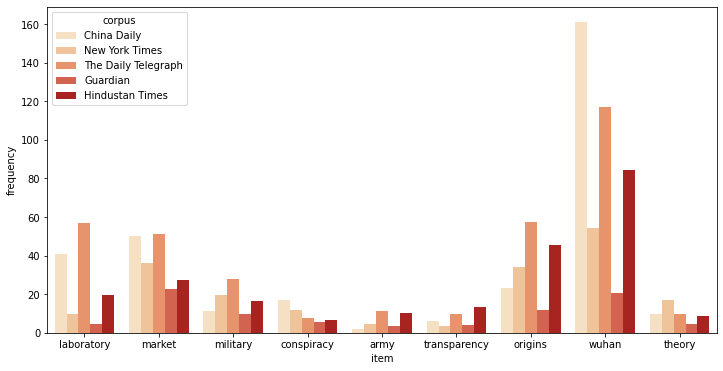

In [8]:
compare_plot(origin_compare, 'China Daily', 'New York Times', 'The Daily Telegraph', 'Guardian', 'Hindustan Times')

Figure: Frequency Comparisons of origin_terms

So are there patterns in terms of generalized frequencies...My answer is yes! Firstly, we can identify patterns between words. For example, here the word "Wuhan" had the highest frequency, as to be expected. Again, broadly looking at trends, it appears that "origins" has the second highest frequency, followed by "market" and perhaps "laboratory". However, we can also identify patterns between sources. In that, the China Daily utilizes the word "army" the least of the terms and "Wuhan" the most. The New York Times mentioned "market" almost the same frequency as "origins". The Daily Telegraph utilized "laboratory" as much as "origins". Surprisingly, the actual usage of the term "conspiracy" and "theory" are not as high as I would expect.

What we see is that there is a great degree of variation both between words and between sources in terms of frequencies. Nevertheless, some general trends are still present. However, just as telling as the words that are mentioned are the words that are not found in sources but included in others. The following analysis specifically compares the three four terms "detrick", "bioweapon", "cold-chain", and "imported", which are all particularly in reference to one of the four theories detailed in the Introduction.

In [9]:
excluded_compare = compare_item(cd_dist, nyt_dist, dt_dist, g_dist, ht_dist, origin_terms[9:], 100000)
excluded_df = pd.DataFrame(excluded_compare, columns=['word','China Daily','NY Times','Daily Telegraph','Guardian','Hindustan Times'])
excluded_df

,word,China Daily,NY Times,Daily Telegraph,Guardian,Hindustan Times
0,detrick,2.671310,0.000000,0.000000,0.010991,0.787408
1,bioweapon,0.000000,0.863490,0.000000,0.076940,0.000000
2,cold-chain,12.628010,0.000000,0.000000,0.153879,0.787408
3,imported,517.505579,3.022215,6.223631,5.649572,15.223217


What immediately stands out is that the Daily Telegraph does not mentioned three of the four words, but does mention "imported". However, considering the relatively high frequencies of the words "laboratory", "origins", and "market" in the Daily Telegraph compared to some of the other sources, it is a possibility that the focus and/or coverage in the Daily Telegraph is more broad and less focused on going into detail on any one theory besides the lab-leak. It is also interesting to note that the Guardian is the only source of the five that mentions all four of the words in their articles, even if the normalized frequencies are somewhat smaller. The Hindustan Times is similar, mentioning three of the four words, leaving out "bioweapon".

Furthermore, there is a clear lack of the word "bioweapon" in the China Daily corpus and clear absence of the words "detrick" and "cold-chain" in the New York Times. As a refresher, "bioweapon" is used as part of the conspiracy theory that suggests that China has manufactured a bioweapon, namely COVID-19. The fact that the word "bioweapon" is not found in its own texts is unsurprising, like avoiding a controversial topic that could implicate themselves. Analogously, the word "detrick" refers to Fort Detrick in Maryland, where China believes was the source of the virus. "Cold-chain" is a theory heavily founded in China, critical of other nations as this conspiracy touts that frozen meats from other countries brought the virus into Wuhan. The fact that those two words, in which the US would technically be implicated, are entirely absent in the NY Times corpus is telling. Additionally, the two words that are included in the NY Times corpus are "bioweapon", targeting China and "imported", a theory birthed out of China. Furthermore, the frequency of "cold-chain" is shockingly high in the China Daily, which suggests that writers for the China Daily may be more inclined to cover a theory that criticizes other nations moreso than their own.

Another notable finding is that the frequencies of these "excluded" words pale in comparison to the frequency for "laboratory", in relation to the lab-leak theory. It's important to keep in mind that while these frequenciess for "detrick" and "bioweapon" are telling, so is the fact that the sources tend to cover the lab-leak above the others.

These findings seem to support the notion that perspective definitely matters and the publication certainly frames the narrative. Just as we saw variations in the frequencies of words within a source and between sources for words found in all five sources, we see a great deal of variation in the words that are explicitly mentioned in some but not all sources. Identifying which words are left out and which are included provides a perspective as to the types of content covered these sources are inclined to cover and thus likely to influence public discourse.

However, it is possible that a term may be used in multiple ways and not all indicative of the same conclusion. In the next solution, let's take a look at the context surrounding some of the origin_terms in some of the sources. (For a complete analysis of all the terms, take a look at the data_analysis notebooks!).

### Contextual Trends: KWIC Analysis

In this section, we will dive into a keyword in context (KWIC) analysis, to look at every instance of a particular word, its meaning and usage. Let's start off with one of my favorites, "detrick" as it is found in the China Daily and "bioweapon" as it is found in the New York Times.

In [10]:
print_kwic(make_kwic('detrick',cd_comp_toks))

                  hour's drive from fort  detrick  base some people suspected
                     or usamriid at fort  detrick  maryland has resumed full
                     the closure of fort  detrick  to clarify whether the
                   the institute in fort  detrick  was suspended once in
                     they wrote --- fort  detrick  biological base is situated
                 since the outbreak fort  detrick  has been mentioned more
              importantly last july fort  detrick  was mysteriously closed and
                     the closure of fort  detrick  and an outbreak of
                   outbreak and the fort  detrick  hoping that the us
             infectious diseases at fort  detrick  was closed; 8/2019: a
                     the closure of fort  detrick  were deleted from online


Here we see that the instances of the word "detrick" all reference Fort Detrick. Most of these mention the "mysterious closure" back in July that those who believe this conspiracy theory in China believe was the time at which COVID-19 was born and later released. One specifically mentions how the mention of Fort Detrick's closure was deleted from online and that suspicions are festering in the public.

In [11]:
print_kwic(make_kwic('bioweapon',nyt_comp_toks))

                      was concocted as a  bioweapon  and they agree that
                      was concocted as a  bioweapon  and they agree that
                        was created as a  bioweapon  by the chinese government
                      was concocted as a  bioweapon  they agree that it
                        it is an escaped  bioweapon  misinformation about the virus
                      was concocted as a  bioweapon  and they agree that
                        it is an escaped  bioweapon  misinformation about the virus
                      was concocted as a  bioweapon  they agree that it
                      was concocted as a  bioweapon  and they agree that
                        was created as a  bioweapon  by the chinese government


We can then look at "bioweapon" in the New York Times and see that the word "concocted" is used multiple times, as well as "escaped", and "misinformation" alongside "bioweapon". The usage aligns with the conspiracy theory of China manufacturing a viral weapon.

In [12]:
print_kwic(make_kwic('cold-chain',cd_comp_toks))

         personnel contaminated goods in  cold-chain  logistics animal products or
                  have been triggered by  cold-chain  imports from overseas adding
        be transmitted from contaminated  cold-chain  products to humans based
          of intensifying supervision of  cold-chain  imports especially for countries
                  still raging the study  cold-chain  food contaminationôºçthe possible origin
          contaminated imported food via  cold-chain  logistics the study said
             live novel coronavirus from  cold-chain  food products in qingdao
                the study's finding that  cold-chain  food is likely to
             the virus spreading through  cold-chain  logisticsôºçwere deemed possible liang
                       world the role of  cold-chain  and cold products in
                       globe the role of  cold-chain  and cold products in
           months show that contaminated  cold-chain  food products are the
              coronaviru

At a even higher frequency than "detrick" is the mention of the "cold-chain" theory in the China Daily. All instances of "cold-chain" found allude to the theory, in which "contaminated", "inbound", "imported" food from overseas brought the virus in. Some cite that cold-chain workers fell ill, referencing the need to safeguard the safety and health of the workers who come into contact with these food products as part of their occupational responsibilites.

The three KWIC analyses above looked explicitly at words found in some but not all sources and how those are used in the sources that did include them. Now let's take a look at how the fundamental words of "origins" and "conspiracy" are utilized across the texts in context.

In [13]:
print_kwic(make_kwic('origins',cd_comp_toks))

                slagging match about the  origins  of the virus rudd
           conspiracy theories about the  origins  of the virus she
              statements about the exact  origins  of the outbreak meanwhile
                      a theory about the  origins  of the covid-19 virus
                 on tuesday explored the  origins  of sars-cov-2 another name
          bilateral criticisms about the  origins  of the virus so
           tasked with investigating the  origins  of the coronavirus disease
             closer to understanding the  origins  of the virus he
             independent review into the  origins  of the coronavirus and
    insulting language about virological  origins  now is the time
         international team studying the  origins  of covid-19 has expressed
                      china to trace the  origins  of the novel coronavirus
              who team investigating the  origins  of covid-19 greets liang
                    experts to trace the  origins  of

Looking at the usage of "origins" is very telling in the China Daily. We see contextual words like "untraceable", "unknown", "theories", "investigations", "labeling", "indications", "inquiries", "demystifying" that all allude to the lack of information regarding the virus' origins when considering these conspiracies. Momentarily ignoring science, it would appear from this KWIC analysis that the mysteriousness of the virus' origins is of focus. Potentially, it might even be slightly more negative when framing these mysterious origins with their mentions of Fort Detrick and the cold-chains that would place blame onto every other nation. Is this also the case with the New York Times?

In [14]:
print_kwic(make_kwic('origins',nyt_comp_toks))

                    don’t know about the  origins  of the ongoing pandemic
                 listener loses track of  origins  and with it any
              to investigating the virus  origins  from the outset” tarik
                new conspiracy about the  origins  of covid-19: that it
             owner acknowledged that its  origins  were ''based on a
               beard-winning chef on the  origins  of soul food “while
              failure to investigate the  origins  of the coronavirus which
                 asian americans and the  origins  of the model minority''
               give falsehoods about the  origins  of the virus the
                         to pin down the  origins  of a virus that
              schools as “prisons” whose  origins  lay in capitalists’ desire
                    episode is about the  origins  of the coronavirus outbreak
           organization inquiry into the  origins  of the virus arguing
           organization inquiry into the  origins  of the

Looking at "origins" within the New York Times, we something similar in that a majority of these refer to "tracing", "identifying", "investigating", all actions to pinpoint the origins of the virus. It is perhaps more varied, with mentions of the police, universities, capitalist desire, the FBI, Trump, amongst a couple of others. It appears from this KWIC analysis that the breadth of topics is larger with the New York Times but all grounded in the US. 

In tandem to these KWIC analyses of the "origins", we can then look specifically at "conspiracy". After all, that is the whole topic of this article.

In [15]:
print_kwic(make_kwic('conspiracy',cd_comp_toks))

                   weeks there have been  conspiracy  theories on social media
               to spread obviously false  conspiracy  theories about the origins
         aggressively pushing a debunked  conspiracy  theory that the coronavirus
              modified shooting down the  conspiracy  theory anthony fauci director
          demonizing china and spreading  conspiracy  theories about the pandemic's
                        focal point of a  conspiracy  theory pushed by some
            promote what are essentially  conspiracy  theories that are not
                     part by bigotry and  conspiracy  theories that grew online
             match of misinformation and  conspiracy  theories more research needed
              politicians who traffic in  conspiracy  theories or insulting language
updated: 2020-04-29 02:17 photo/agencies  conspiracy  theories suggesting that the
              further by fabricating the  conspiracy  theory that the virus
                 its sovereign

Most blatantly, examining the usage of "conspiracy" in the China Daily is very telling! We can see words that precede conspiracy like "condemning", "denouncing", "dismissing", "debunking", "misinformation", etc. that all support the notion of denying conspiracy theories. Two great examples are with "demonizing China and spreading conspiracy theories", which is rich coming from China Daily, and "aggressively pushing a debunked conspiracy" which reads as quite a loaded statement. Furthermore, many of these words are quite negative in connotation and assertive above all else. 

In [16]:
print_kwic(make_kwic('conspiracy',nyt_comp_toks))

                     publicly spun a new  conspiracy  about the origins of
                        this was an evil  conspiracy  of the enemy” mr
         chinese officials openly spread  conspiracy  theories of their own
                   only further fuel the  conspiracy  theories” he said as
                        a history of the  conspiracy  theory and concluding that
                believing in ugly racist  conspiracy  theories my disappointment was
  dysfunction widespread complacency and  conspiracy  theories on wednesday the
              the kagame government this  conspiracy  theory has become known
               so many stupid ridiculous  conspiracy  theories about black people
                       the form of those  conspiracy  theories and low-information rumors
        depravity by prominent alt-right  conspiracy  theorists like jack posobiec
          american websites that promote  conspiracy  theories one such story
               duran to popular american  cons

Some notable observations here with "conspiracy" in the New York Times, most clearly it's followed by theory/theories. This is absolutely to be expected. However, what precedes "conspiracy" is quite varied. We see instances of falsehoods of anti-American conspiracies and claims of conspiracy regarding the virus' origins, some spread by "Chinese officials". But we also see a lot of instances including terms related to politics, something that was not seen whatsoever in the China Daily. For example, there are now mentions of democratic, right-wing, alt-right, pro-Trump, etc. that tie these conspiracies with the political realm within a phrase.

In [17]:
print_kwic(make_kwic('conspiracy',ht_comp_toks))

                website known to promote  conspiracy  theories to bolster his
          ministry officials even shared  conspiracy  theories that accused the
                    last year - plugging  conspiracy  theories about the origin
          ministry officials even shared  conspiracy  theories that accused the
               epidemic and for criminal  conspiracy  union home minister amit
                       which grew into a  conspiracy  theory was that the
                  to murder and criminal  conspiracy  were added to the
          the centre of covid-19-related  conspiracy  theories because of her
                remove false content and  conspiracy  theories about covid-19 that
             and some celebrities spread  conspiracy  theories about its origins
          ministry officials even shared  conspiracy  theories that accused the
                          is the rise of  conspiracy  theories around the issue
          ministry officials even shared  conspiracy  t

With the word "conspiracy" in the Hindustan Times, we see another interesting distinction. A majority of these cite conspiracy theories but they also mentions sources. For example, there is a "website known to promote conspiracy theories", "some celebrities spread conspiracy theories about its origins", and also a Nature Medicine study "dismissing the theories". This was not seen in the other sources in that there are mentions of how these theories are propagating on a societal level. Whereas with the China Daily and New York Times KWIC analyses it appeared deep into discussing theories themselves, the Hindustan Times takes perhaps a different focus on the mechanism of conspiracy diffusion.

In [18]:
print_kwic(make_kwic('conspiracy',dt_comp_toks))

          that amplified covid-19 origin  conspiracy  theories and those that
                 as a donald trump-style  conspiracy  theory when the daily
                    to the pandemic with  conspiracy  theories and fake miracle
                          the story as a  conspiracy  theory and -citing condemnations
                   high and mighty about  conspiracy  theories recall that the
               cash pushing the greatest  conspiracy  theory of all still
               and russia have -targeted  conspiracy  narratives to shift the
                    to the pandemic with  conspiracy  theories and fake miracle
                media posts and -bizarre  conspiracy  theories as a friend
                     again for pushing a  conspiracy  -theory that covid-19 came
            obsession of popular youtube  conspiracy  theorist cum political commentator
                      with a giant media  conspiracy  to shut him up
                    zhao even pushed the  conspiracy  

With the Daily Telegraph, we see another interesting pattern. Although the frequency of the word conspiracy is not as high as some of the other terms, it's amusing to see that the usage is really quite different. Obviously there are mentions of the COVID-19 origin conspiracy theories, but there are also mentions of a Donald Trump-style conspiracy theory, a phrase not yet encountered before. The Daily Telegraph even mentions Russia in targeting conspiracy narratives, subject matters not previously seen even though the frequencies of the word "conspiracy" have been relatively high for all the sources.

In [19]:
step=int(len(g_doc)/10)
for chunk_index in range(0,len(g_doc),step):
    g_toks = tokenize(g_doc[chunk_index:chunk_index+step], lowercase=True, strip_chars=characters_to_remove)
    print_kwic(make_kwic('conspiracy',g_toks))

      believing a baseless qanon-related  conspiracy  theory that the online
               she believed the debunked  conspiracy  theory while continuing to
                  in a global pedophilia  conspiracy  she replied: you know
               the far right antisemitic  conspiracy  theory she has almost
      believing a baseless qanon-related  conspiracy  theory that the online
               she believed the debunked  conspiracy  theory while continuing to
                  in a global pedophilia  conspiracy  she replied: you know
               the far right antisemitic  conspiracy  theory she has almost
              ratcheted up his obamagate  conspiracy  theory to implicate joe
      related: trump deepens 'obamagate'  conspiracy  theory with biden unmasking
               chief dismisses wuhan lab  conspiracy  theory in the uk
               chief dismisses wuhan lab  conspiracy  theory in the uk
              of receiving such vaccines  conspiracy  theories and misinformat

                     has doubled down on  conspiracy  theories about election fraud
               qanon movement a baseless  conspiracy  theory that posits satan-worshipping
                 people trying to create  conspiracy  theories” read more of
               associated with the qanon  conspiracy  theory following the insurrection
            accounts promoting the qanon  conspiracy  theory after many of
                 the propagation of this  conspiracy  theory across the service”
                    or promote the qanon  conspiracy  theory however university of
                     noted last year the  conspiracy  theory had proved popular
                because of other similar  conspiracy  theories such as agenda
                   of current events and  conspiracy  theories such as the
                   covid-19 - a baseless  conspiracy  theory that has led
                the pandemic the biggest  conspiracy  theory thousands of people
                the pandemic the 

                   that appeared to hold  conspiracy  theories partially responsible for
                    they really do think  conspiracy  theories have played a
                  health to clarify what  conspiracy  theories specifically it believed
                behaviour with belief in  conspiracy  theories or distrust in
algorithms systematically recommend disinformation  conspiracy  theories white supremacism and
                  about covid-19 such as  conspiracy  theories about the virus's
                  about covid-19 such as  conspiracy  theories about the virus's
                   up countless lies and  conspiracy  theories concerning china public
                    mps to stop peddling  conspiracy  theories about the us
              embraces the lunatic qanon  conspiracy  theory pictwittercom/j1gpdznrxl - aaron
               and pushes an antisemitic  conspiracy  theory that the billionaire
                 to establish a criminal  conspiracy  between trump's ca

              been decried for spreading  conspiracy  theories about covid-19 has
             the debate could legitimise  conspiracy  theories in a country
            fringe party may 'legitimise  conspiracy  theories' 409am bst the
              been decried for spreading  conspiracy  theories about covid-19 has
             the debate could legitimise  conspiracy  theories in a country
                    china late last year  conspiracy  theories that the virus
                  the spread of damaging  conspiracy  theories linking mobile phone
                     page of the british  conspiracy  theorist david icke who
                    china late last year  conspiracy  theories that the virus
                  the spread of damaging  conspiracy  theories linking mobile phone
                     page of the british  conspiracy  theorist david icke who
                   vaccines 5g and other  conspiracy  theories ossified around the
                   vaccines 5g and other  c

Here we see an amalgamation of all the features of the previous KWIC analyses. For one, we see the typical references to conspiracy theories of the virus's origins. We see political mentions of right-wing politics, populist speeches, misinformation, pro-trump, etc. We see the naming of specific theories like the bioweapons theory. We see relatively negative connotation words. We see mentions of media platforms like Youtube and even the names of conspiracy theorists who might have been spreading and propagating these theories. Above all, we see the mention of a new COVID-19 theory. It's an obscure theory that I have not heard of --- the 5G coronavirus conspiracy theory. This theory posits that 5G cellphone towers are the root cause of the deadly virus. 

It appears that "conspiracy" is being used quite broadly in the Guardian and covers a greater breadth of topics, with some seemingly unrelated to COVID-19 origin conspiracies but broader political conspiracies. Many of these are more detailed in the exact conspiracy theories, especially given this 5G conspiracy.

Thus far, there are clear patterns in the frequencies of "conspiracy" related terms and timing of publications. There are some variations in the terms that directly reference any particular theory, but terms like "origins" and "conspiracy" are all used relatively high in number. Yet, their contexts vary quite a bit between the five sources. Does this perhaps reflect the differences between the corpora?

### Just How Different - Document Term Matrix

There might be differences between the corpora which a document term matrix can be helpful in visualizing. It utilizes a color map to map out similarities and differences on the scale with 1.0 being identical and 0.0 being no similarity. I'd expect there to be some similarities but primarily for it to be quite different based on some of the findings previously.

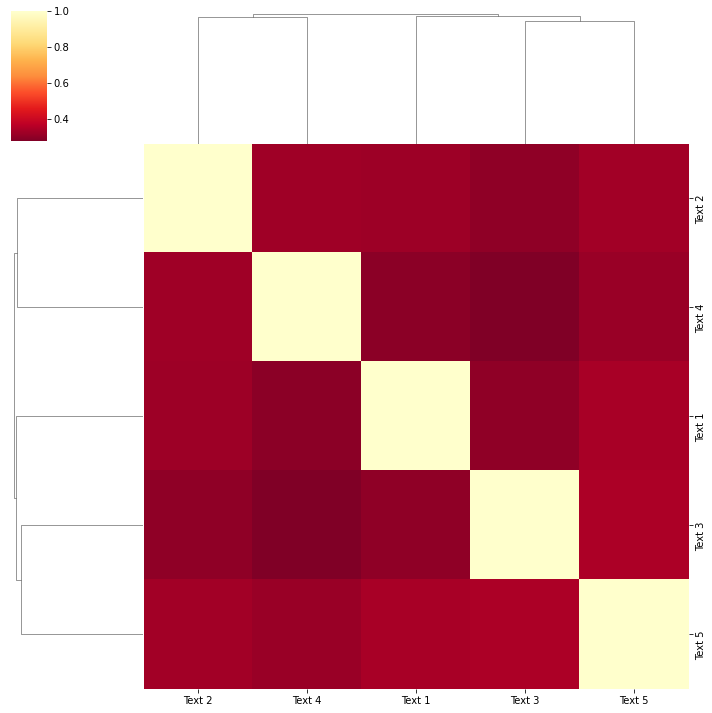

In [20]:
sn.clustermap(cosine_similarity(dtm), 
               yticklabels=labels,
               xticklabels=labels,cmap='YlOrRd_r')

Figure: Document Text Matrix

We see that the five sources, in every possible 2 pair combination, are very different from each other text-wise. Text 1 refers to China Daily, Text 2 refers to NY Times, Text 3 Daily Telegraph, Text 4 Guardian, and Text 5 Hindustan Times. Comparing Text 1 to itself will have a score of 1.0 since they are identical. But we see that Text 1 and Text 2 and every other combination have close to zero scores. Using this approach, it's akin to a bag of words, in which the count and frequencies are retained but not their ordering. This finding is not too surprising. After all we are dealing with 5 sources from different countries, although some degree of similarity in text is expected since they are all reputable news sources.

### China Daily vs. New York Times: Keyness Comparison

At this point, I turn my attention to specifically the China Daily and the New York Times. While there are interesting findings with the other three corpora, the seeming finger-pointing exercise between China and the US is particularly of interest to me. In other words, China's emphasis on conspiracy theories, as we have seen previously, is directed towards the US whereas US's emphasis is directed towards China. Yet textually we've seen commonalities and also stark differences in frequencies of words.

Looking at just the China Daily and the New York Times, I conducted a keyness analysis between the two corpora, taking the frequency lists generated previously and doing an item-by-item comparison of their relative frequencies. Thus this allows me to evaluate the word/phrase frequencies in one corpus compared to another. Here, I selected trigrams, 3 word phrases, for analysis to capture to some extent a contextual presentation.

In [21]:
keyness_df = calculate_keyness(cd_trigram_dist, nyt_trigram_dist, print_table=False, top=-1, keyness_threshold=-100000)

<AxesSubplot:xlabel='Keyness'>

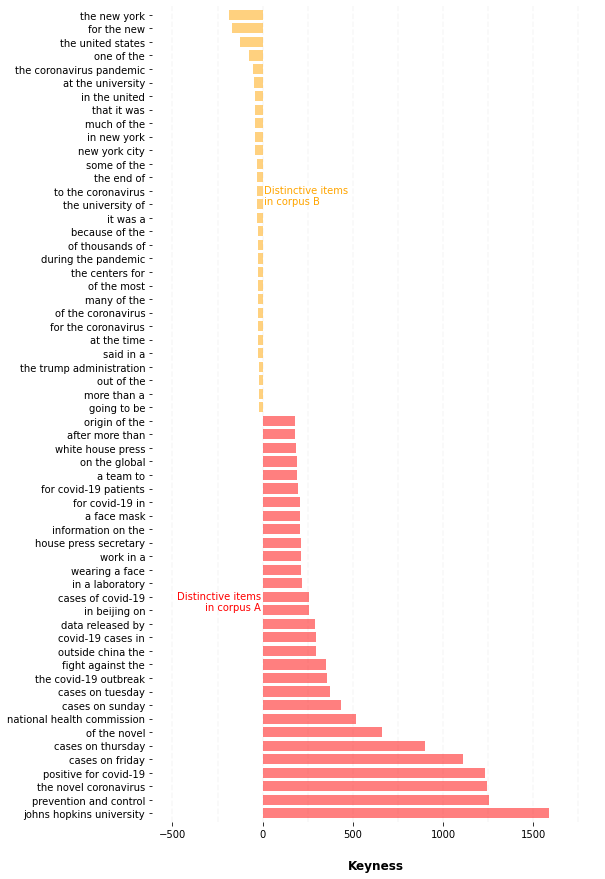

In [22]:
plot_keyitems(keyness_df, 30, c1='red', c2='orange')

Figure: China Daily vs. NY Times Keyness

In the horizontal bar plot above, each bar is one of the trigrams and the bar size is representative of the "keyness value". Here we see the top 30 most distinctive three-word phrases in the China Daily corpus, in red, and the top 30 most distinctive three-word phrases in the New York Times, in yellow. In corpus A (China Daily), there is a focus on COVID-19 cases and cases count. Some interesting trigrams include "outside china the", "in a laboratory", and perhaps most relevant "origin of the". The is a focus that appears, amongst others, to be on COVID-19 cases, origins, and sources. In corpus B (NY Times), there is a more institution focus, including "the trump administration", "at the university", "the centers for", and more broadly looking inside the United States. This tells quite a bit not only about content but also the scope.

### Sentiment Analysis

With all the text we have been considering, a primary dimension of word meaning lies in VAD (valence, arousal, and dominance.
 - V: valence is the positive -- negative or pleasure -- displeasure dimension.
 - A: arousal is the excited -- calm or active -- passive dimension.
 - D: dominance is the powerful -- weak or "have full control" -- "have no control" dimension.

For each word and dimension, the scores range from 0 to 1. Utilizing the NRC VAD Lexicon might allow us to look into features of sentiment, emotion, and other affect-related aspects of these texts. For the following sentiment analysis, my unit of analysis is smaller than with other analyses. Namely, I have narrowed down the collection of texts to only those that explicitly contain at least one of the fundamental origin_terms.

In [23]:
vad_sentiment=pd.read_csv('../final_data_story/visualizations/vad_sentiment.csv')
vad_sentiment

,Unnamed: 0,China Daily,NY Times,Daily Telegraph,The Guardian,Hindustan Times
0,Valence,0.608229,0.589364,0.590747,0.590029,0.597564
1,Arousal,0.454308,0.458881,0.469662,0.457903,0.446440
2,Dominance,0.580051,0.556136,0.568170,0.564538,0.569565


Interestingly there doesn't appear to be too large of a variation in this sentiment analysis between sources. Looking at valence, the China Daily has a marginally higher average at 0.61 indicative of a more positive dimension. However, all four other sources are close in their averages. Regarding arousal, the score are now in the 0.45 range, but the range is extremely small. Looking at dominance scores, the China Daily does have a marginally higher dominance score, indicative of a greater powerful, have full control dimension. The New York Times has the lowest dominance score, lower than the other scores by a miniscule difference.

The differences between the corpora does not appear to be significant whatsoever. There are two major possibilities based on this finding. The first is that the sentiment analysis measure failed to capture true differences present as sentiment analyses can be particularly tricky with non-social media sources. This is entirely possible, as methods of sentiment analysis work more effectively for items like tweets and not necessarily news corpora. The second possibility is that the news sources treat their topics of coverage with a roughly similar sentiment nature. What varies is not the magnitude of the sentiment or VAD scores but rather the content themselves. In other words, this may suggest that China's sentiments, in measures of positivity/negativity, active/calm, and control power/weak are similar to the US's in the New York Times. It's really that China's sentiments relate to conspiracy theories that focus on countries outside of China and US's sentiments relate to conspiracy theories that focus on China. 

### Limitations

A couple of limitations in this analysis warrant acknowledgement. The first and most major limitation is that this is a subset of news articles from five select sources. They are by no means to be strictly representative of the countries for which these publications derive from, but rather aim to pull from five sources that are not all concentrated in the US and reach a primarily American audience. To conclude the former would be an oversimplification. A great extension would be to expand the corpus, to narrow down the search terms, etc.

Another limitation is that I looked at a specific subset of origin_terms that are not aimed to be entirely representative. This is a starting point and can be expanded upon easily by including more terms to analyze. Additionally, the methodologies for analysis, particularly with the sentiment analysis and keyness analysis can be tackled from multiple angles. Altering the unit of analysis is one example. 

Furthermore, I acknowledge the inherent complexities in analyzing texts from different countries. For example, luckily I chose the China Daily which is an English-language based news source, but expanding and taking on a truly global analysis would likely involve translated texts that may obscure textual differences.

Ultimately, from these limitations, I see great opportunity to expand upon this story and for improvement, and that's for any child, student, or individual with a love for Python and fascination with conspiracy theories, especially once this entire pandemic is finally over.

### Conclusion

After all this analysis, what can we say about news coverage of COVID-19 conspiracy theories between the China Daily, the New York Times, the Daily Telegraph, the Guardian, and the Hindustan Times? For one, the news media seem to react at similar times, with surges in publications in relation to current events and public discourse. There has been recent buzz about new COVID-19 conspiracy theories, so if we were to extend this analysis into a few months from now, we likely will see an additional surge in all five publications. Additionally, common origin conspiracy related terms are particularly high in frequency when compared to other more specific conspiracy terms. Specific terms are absent in certain sources, seemingly the ones that relate to theories critical of one's own country. 

Upon KWIC context analysis however, it appears that the focal points are quite varied. Looking at the context surrounding the origin terms in the five sources, it is apparent that different topics and phrases are present, even though they share a similarly high frequency of usage for a particular word. We even saw a 5G conspiracy theory in one publication source not brought up whatsoever in the others. The document term matrix was helpful in visualizing just how different the sources are based on the frequencies.

Focusing attention on the China Daily - New York Times duo, the differences are even more apparent when comparing trigrams. Surprisingly, the sentiments between the two and between all five sources show no significant differences. 

**The key takeaway here is that there is just so much variation.** Despite the similarities and frequencies to consider, there are significant differences in some dimensions and not others. The content varies; the phrasing varies; the context varies; the words themselves vary too. 

As with any textual analysis, it's important to proceed with caution with these findings. But remember, what one news source selectively covers, how they cover it, and when they cover it are not only influenced by an array of factors but can have varying effects on the public that engages with and consumes this information. Especially when we're looking at COVID-19 conspiracy theories, I would argue that nothing is too crazy to consider. **It's inherently complicated and complex.** As the pandemic plays out, it'll be interesting to see how these conspiracies develop, how new ones arise, how old ones die, and how our news sources cover such, whether it be the NY Times or the China Daily.

### Sources

This data story utilized two primary dataset files. The first was a bulk data download from NexisUni using the keyword search items of "COVID-19" and "origins", narrowed to publications post January 1, 2019 until the end of March 2021. Only publications from the China Daily (China), The New York Times (US), The Daily Telegraph (Australia), The Guardian (UK), and Hindustan Times (India) were included.

 - Source: Nexis Uni, Lexis Nexis: https://www.lexisnexis.com/en-us/professional/academic/nexis-uni.page
 
However, the bulk download only included 32 articles from the China Daily even though a great deal more are found using a manual search on Lexis Nexis. Thus, a second data file was utilized consisting of only China Daily publications meeting the same search criteria excluding the 32 already included.

 - Source: Lexis Nexis: https://www.lexisnexis.com/en-us/gateway.page

Additional references for information about COVID-19 conspiracy theories and timelines 

 - Lab-Leak Theory: Brewster, J. (2020, May 24). A Timeline Of The COVID-19 Wuhan Lab Origin Theory. Forbes. https://www.forbes.com/sites/jackbrewster/2020/05/10/a-timeline-of-the-covid-19-wuhan-lab-origin-theory/?sh=221fd9115aba. 
 - Biowarfare Theories: Nie J. B. (2020). In the Shadow of Biological Warfare: Conspiracy Theories on the Origins of COVID-19 and Enhancing Global Governance of Biosafety as a Matter of Urgency. Journal of bioethical inquiry, 17(4), 567–574. https://doi.org/10.1007/s11673-020-10025-8
 - Cold-chain Theory: Lewis, D. (2021, February 26). Can COVID spread from frozen wildlife? Scientists probe pandemic origins. Nature News. https://www.nature.com/articles/d41586-021-00495-0. 
 - General Overviews: David Klepper, F. A. (2021, February 15). The superspreaders behind top COVID-19 conspiracy theories. AP NEWS. https://apnews.com/article/conspiracy-theories-iran-only-on-ap-media-misinformation-bfca6d5b236a29d61c4dd38702495ffe. 